In [28]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import numpy as np
import pandas as pd
from config import api_key
from citipy import citipy
import random


In [29]:
# Getting random cities
city_list = []

qty = 1600

for instance in range(int(-qty/2), int(qty/2)):
    lat = instance*90/(qty/2)
    lng = random.uniform(-180,180)

    city = citipy.nearest_city(lat,lng)

    if (city.city_name, city.country_code) not in city_list:
        city_list.append((city.city_name,city.country_code))

len(city_list)



645

In [30]:
# Emtpy DF
data_df = pd.DataFrame(city_list)
data_df = data_df.rename(columns={0:"City", 1:"Country Code"})
data_df["Lat [deg]"] = ""
data_df["Lng [deg]"] = ""
data_df["Temperature [C]"] = ""
data_df["Humidity [%]"] = ""
data_df["Cloudiness [%]"] = ""
data_df["Wind Speed [kph]"] = ""
data_df.head(2)

,City,Country Code,Lat [deg],Lng [deg],Temperature [C],Humidity [%],Cloudiness [%],Wind Speed [kph]
0,albany,au,,,,,,
1,hermanus,za,,,,,,


In [31]:
# Weather API url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Fill DF
notfound = []

for index, row in data_df.iterrows():
    try:
        query_url = url + "appid=" + api_key + "&q=" + row["City"]
        response = requests.get(query_url).json()
        data_df.loc[index,"Lat [deg]"]=response["coord"]["lat"]
        data_df.loc[index,"Lng [deg]"]=response["coord"]["lon"]
        data_df.loc[index,"Temperature [C]"]=response["main"]["temp"]
        data_df.loc[index,"Humidity [%]"]=response["main"]["humidity"]
        data_df.loc[index,"Cloudiness [%]"]=response["clouds"]["all"]
        data_df.loc[index,"Wind Speed (kph]"]=response["wind"]["speed"]
    except:
        notfound.append(row["City"])
        data_df=data_df.drop(index)

data_df["Temperature [C]"] = (data_df["Temperature [C]"]-273.15)
data_df.rename(columns={ data_df.columns[7]: "x"}, inplace=True)
del data_df["x"]
data_df.head(2)



,City,Country Code,Lat [deg],Lng [deg],Temperature [C],Humidity [%],Cloudiness [%],Wind Speed (kph]
0,albany,au,42.6001,-73.9662,17.57,91,100,0.89
1,hermanus,za,-34.4187,19.2345,19.33,47,97,1.44


In [32]:
# Convert to csv
data_df.to_csv(r"Analysis.csv", index=False)


In [33]:
# scatter Temp vs Lat
def scatter1(x_val,y_val,x_label,y_label,title,regress):
    x_val.astype("float32")
    y_val.astype("float32")

    plt.scatter(x_val,y_val)
    if regress==True:
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)

        regval = x_val * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        r_sq="r-sq="+str(round(rvalue,2))
        plt.plot(x_val,regval,"r-")
        x_loc=round(np.percentile(x_val,30),0)
        y_loc=round(np.percentile(regval,30),0)
        
        plt.annotate(line_eq,(x_loc,y_loc),fontsize=16,color="black")
        plt.annotate(r_sq,(x_loc,y_loc-10),fontsize=16,color="black")
        
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    plt.savefig(f"Images/{title}.png")
    plt.show()


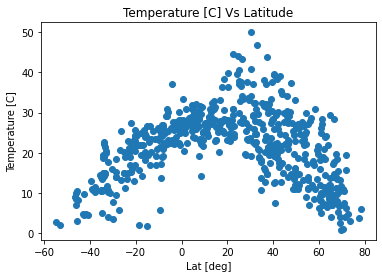

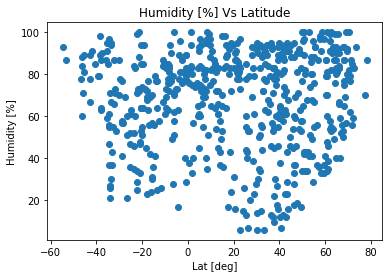

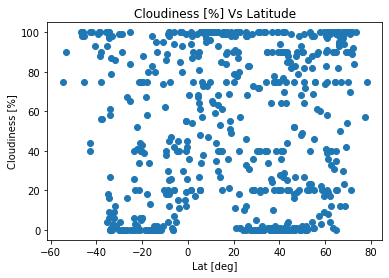

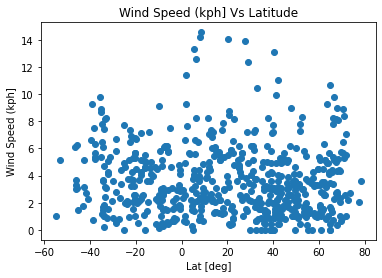

In [35]:
# scatter Temp vs Lat
# scatter Humidity vs Lat
# scatter Cloudiness vs Lat
# scatter Wind Speed vs Lat

factor1 = ["Temperature [C]"]
factor2 = ["Humidity [%]"] 
factor3 = ["Cloudiness [%]"] 
factor4 = ["Wind Speed (kph]"]
regress=False

for y_fact in factor1:
    x_val=data_df["Lat [deg]"]
    y_val=data_df[y_fact]
    x_label = "Lat [deg]"
    y_label = y_fact
    title = f"{y_fact} Vs Latitude"
    scatter1(x_val, y_val, x_label, y_label, title, regress)
   
for y_fact in factor2:
    x_val=data_df["Lat [deg]"]
    y_val=data_df[y_fact]
    x_label = "Lat [deg]"
    y_label = y_fact
    title = f"{y_fact} Vs Latitude"
    scatter1(x_val, y_val, x_label, y_label, title, regress)

for y_fact in factor3:
    x_val=data_df["Lat [deg]"]
    y_val=data_df[y_fact]
    x_label = "Lat [deg]"
    y_label = y_fact
    title = f"{y_fact} Vs Latitude"
    scatter1(x_val, y_val, x_label, y_label, title, regress)

for y_fact in factor4:
    x_val=data_df["Lat [deg]"]
    y_val=data_df[y_fact]
    x_label = "Lat [deg]"
    y_label = y_fact
    title = f"{y_fact} Vs Latitude"
    scatter1(x_val, y_val, x_label, y_label, title, regress)


The above scatter plots are a comparison of Latitude vs the factors from the data set (Temperature, Humidity, Cloudiness & Wind Speed) based on the random data pulled from the weather api.

In [36]:
# Split into Northern & Southern Hemisferes

nh_df = data_df[data_df["Lat [deg]"]>=0]
sh_df = data_df[data_df["Lat [deg]"]<0]

<Figure size 432x288 with 0 Axes>

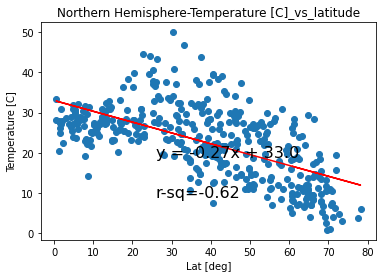

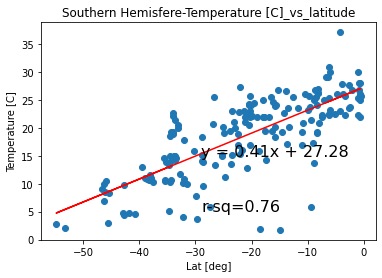

In [37]:
# Compare Temp
plt.savefig(f"Images/{title}.png")
plt.show()

regions = ["Northern Hemisphere","Southern Hemisfere"]
regress=True
for region in regions:
    for y_fact in factor1:
        if region == "Northern Hemisphere":
            data_used_df = nh_df
        elif region == "Southern Hemisfere":
            data_used_df = sh_df
        x_val = data_used_df["Lat [deg]"].astype("float32")
        y_val = data_used_df[y_fact].astype("float32")
        x_label = "Lat [deg]"
        y_label = y_fact
        title = f"{region}-{y_fact}_vs_latitude"
        scatter1(x_val,y_val,x_label,y_label,title,regress)


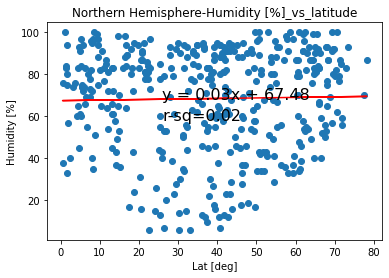

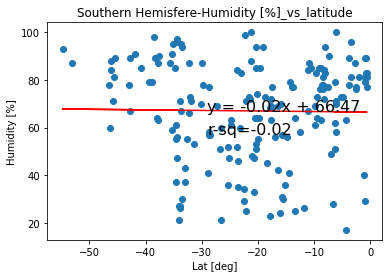

In [38]:
# Compare Humidity
for region in regions:
    for y_fact in factor2:
        if region == "Northern Hemisphere":
            data_used_df = nh_df
        elif region == "Southern Hemisfere":
            data_used_df = sh_df
        x_val = data_used_df["Lat [deg]"].astype("float32")
        y_val = data_used_df[y_fact].astype("float32")
        x_label = "Lat [deg]"
        y_label = y_fact
        title = f"{region}-{y_fact}_vs_latitude"
        scatter1(x_val,y_val,x_label,y_label,title,regress)

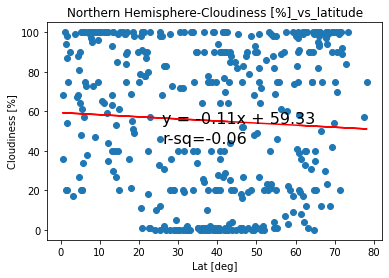

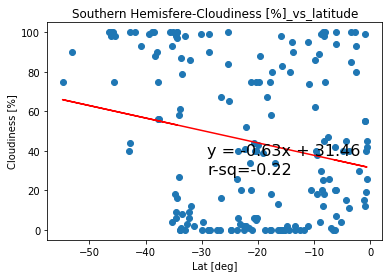

In [39]:
# Compare Cloudiness
for region in regions:
    for y_fact in factor3:
        if region == "Northern Hemisphere":
            data_used_df = nh_df
        elif region == "Southern Hemisfere":
            data_used_df = sh_df
        x_val = data_used_df["Lat [deg]"].astype("float32")
        y_val = data_used_df[y_fact].astype("float32")
        x_label = "Lat [deg]"
        y_label = y_fact
        title = f"{region}-{y_fact}_vs_latitude"
        scatter1(x_val,y_val,x_label,y_label,title,regress)

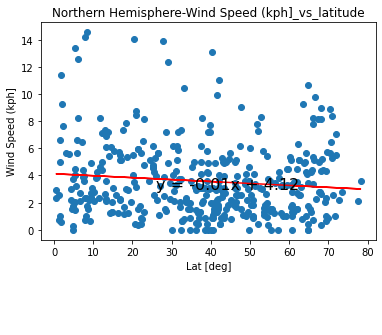

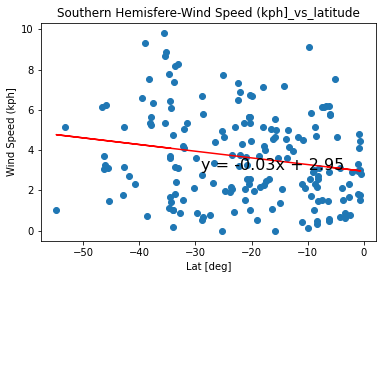

In [40]:
# Compare Wind Speed
for region in regions:
    for y_fact in factor4:
        if region == "Northern Hemisphere":
            data_used_df = nh_df
        elif region == "Southern Hemisfere":
            data_used_df = sh_df
        x_val = data_used_df["Lat [deg]"].astype("float32")
        y_val = data_used_df[y_fact].astype("float32")
        x_label = "Lat [deg]"
        y_label = y_fact
        title = f"{region}-{y_fact}_vs_latitude"
        scatter1(x_val,y_val,x_label,y_label,title,regress)

It becomes evident when comparing the Northern vs Southern Hemispheres that the main factor that influences the Temperature is the Latitude of the city.

Humidity & Cloudiness, regardless of the Hemisphere, appear to be linked.

The Wind Speed in the Northern Hemisphere appears to be quite similar, most likely due to the large land areas. The Sourthn Hemisphere, with larger water areas, has a more scattered Wind Speed.